<a href="https://colab.research.google.com/github/Datalab2020/air_project/blob/projet_francois/Projet_air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Projet qualité de l'air en région Centre**

L'OMS et l'union européennes ont émisent des normes pour la qualité de l'air extérieur. Ces normes fixent des seuils pour différents polluants dont ceux observés par Lig'Air. 
Ces polluants ont différents effets :
 - Le NO2 est un gaz irritant pour les bronches.
 - L'O3 est un gaz irritant pour les yeux et l'appareil respiratoire dans son entièreté.
 - Le SO2 est un gaz qui irrite les muceuses de la peau et les voix respiratoires supérieures.
 - le PM 2.5 et le PM 10 sont des particules fines, l'indice correspondant à leurs taille en microns. Ces particules pénétrent dans les voix respiratoires, les effets sur la santé sont encore mal connus mais les personnes les plus sensibles sont les enfants, les personnes âgées, les femmes enceintes et les personne souffrant de pathologies cardiovasculaire ou respiratoires.

## Importation des librairies, DataFrame et premières moyennes globales

In [2]:
import pandas as pd
import folium
from branca.element import Template, MacroElement
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def compte(ville):
    return df.loc[(df["lib_zone"] == ville)].groupby(["valeur", "qualif"]).size()

In [2]:
url = "https://opendata.arcgis.com/datasets/6f64bbd4f94c425791c2ec7eee33bb71_0.csv"
df = pd.read_csv(url)

df["jour"] = pd.DatetimeIndex(df["date_ech"]).day
df["mois"] = pd.DatetimeIndex(df["date_ech"]).month
df["an"] = pd.DatetimeIndex(df["date_ech"]).year

In [3]:
'''
#Polluant Blois 2018
#Janvier
2018janBlois_no2=df.loc[:, ["val_no2", "date_ech", "lib_zone"]][df.lib_zone == "BLOIS"][df.date_ech >= "2018/01/01 00:00:00+00"][df.date_ech < "2018/02/01 00:00:00+00"].sort_values(by= ["date_ech"])
2018janBlois_so2=df.loc[:, ["val_so2", "date_ech", "lib_zone"]][df.lib_zone == "BLOIS"][df.date_ech >= "2018/01/01 00:00:00+00"][df.date_ech < "2018/02/01 00:00:00+00"].sort_values(by= ["date_ech"])
janBlois_o3=df.loc[:, ["val_o3", "date_ech", "lib_zone"]][df.lib_zone == "BLOIS"][df.date_ech >= "2018/01/01 00:00:00+00"][df.date_ech < "2018/02/01 00:00:00+00"].sort_values(by= ["date_ech"])
janBloispm10=df.loc[:, ["val_pm10", "date_ech", "lib_zone"]][df.lib_zone == "BLOIS"][df.date_ech >= "2018/01/01 00:00:00+00"][df.date_ech < "2018/02/01 00:00:00+00"].sort_values(by= ["date_ech"])
janBloispm25=df.loc[:, ["val_pm25", "date_ech", "lib_zone"]][df.lib_zone == "BLOIS"][df.date_ech >= "2018/01/01 00:00:00+00"][df.date_ech < "2018/02/01 00:00:00+00"].sort_values(by= ["date_ech"])
'''

dfGroup = df.groupby(['mois','an', 'lib_zone'])

dfAgre = dfGroup.agg({"val_no2" : 'mean',
                       "val_so2" : 'mean',
                       "val_o3" : 'mean',
                       "val_pm25" : 'mean',
                       "val_pm10" : 'mean'})

dfAgre_index = dfAgre.reset_index()

print(dfAgre_index)

     mois    an     lib_zone   val_no2  val_so2    val_o3  val_pm25  val_pm10
0       1  2018        BLOIS  1.290323      1.0  3.096774         0  2.064516
1       1  2018      BOURGES  1.419355      1.0  3.000000         0  2.064516
2       1  2018     CHARTRES  1.354839      1.0  3.032258         0  2.161290
3       1  2018  CHATEAUROUX  1.290323      1.0  3.000000         0  2.129032
4       1  2018        DREUX  1.387097      1.0  3.096774         0  2.645161
..    ...   ...          ...       ...      ...       ...       ...       ...
267    12  2019  CHATEAUROUX  1.290323      1.0  2.903226         0  2.580645
268    12  2019        DREUX  1.451613      1.0  2.709677         0  2.322581
269    12  2019    MONTARGIS  1.419355      1.0  2.806452         0  2.516129
270    12  2019      ORLEANS  1.193548      1.0  2.806452         0  2.451613
271    12  2019        TOURS  1.516129      1.0  2.870968         0  2.935484

[272 rows x 8 columns]


In [4]:
for ville in dfAgre_index['lib_zone']:
        globals()['Ville_%s' % ville] = dfAgre_index.loc[:, ][dfAgre_index.lib_zone == ville].sort_values(by=['an', 'mois']).reset_index()

In [5]:
moyenneBL = df.loc[(df["lib_zone"] == "BLOIS")].groupby(["an", "mois"]).mean()[["val_no2", "val_so2", "val_o3", "val_pm10", "val_pm25"]]
moyenneB = df.loc[(df["lib_zone"] == "BOURGES")].groupby(["an", "mois"]).mean()[["val_no2", "val_so2", "val_o3", "val_pm10", "val_pm25"]]
moyenneC = df.loc[(df["lib_zone"] == "CHARTRES")].groupby(["an", "mois"]).mean()[["val_no2", "val_so2", "val_o3", "val_pm10", "val_pm25"]]
moyenneCH = df.loc[(df["lib_zone"] == "CHATEAUROUX")].groupby(["an", "mois"]).mean()[["val_no2", "val_so2", "val_o3", "val_pm10", "val_pm25"]]
moyenneD = df.loc[(df["lib_zone"] == "DREUX")].groupby(["an", "mois"]).mean()[["val_no2", "val_so2", "val_o3", "val_pm10", "val_pm25"]]
moyenneM = df.loc[(df["lib_zone"] == "MONTARGIS")].groupby(["an", "mois"]).mean()[["val_no2", "val_so2", "val_o3", "val_pm10", "val_pm25"]]
moyenneO = df.loc[(df["lib_zone"] == "ORLEANS")].groupby(["an", "mois"]).mean()[["val_no2", "val_so2", "val_o3", "val_pm10", "val_pm25"]]
moyenneT = df.loc[(df["lib_zone"] == "TOURS")].groupby(["an", "mois"]).mean()[["val_no2", "val_so2", "val_o3", "val_pm10", "val_pm25"]]

## Graphiques par ville

In [ ]:
'''
url = "https://opendata.arcgis.com/datasets/6f64bbd4f94c425791c2ec7eee33bb71_0.csv"
df1 = pd.read_csv(url)


df1["jour"] = pd.DatetimeIndex(df1["date_ech"]).day
df1["mois"] = pd.DatetimeIndex(df1["date_ech"]).month
df1["an"] = pd.DatetimeIndex(df1["date_ech"]).year

#print(df.head())
#info=df.info()

group_villes2 = df1.groupby(['X','Y','lib_zone','mois','an','date_ech','valeur'])

aggregation = group_villes2.agg({'val_no2' : 'mean',
                                 'val_so2' : 'mean',
                                 'val_o3' : 'mean',
                                 'val_pm10' : 'mean',
                                 'val_pm25' : 'mean'})

aggregation_index = aggregation.reset_index().sort_values(by=['date_ech','lib_zone'])

#avec cette ligne je crée une variable avec le df de chaque ville  
for ville in aggregation_index['lib_zone']:
        globals()['Ville_%s' % ville] = aggregation_index.loc[:, ][aggregation_index.lib_zone == ville].sort_values(by=['date_ech']).reset_index()


profile = pandas_profiling.ProfileReport(Ville_TOURS)
profile.to_file("Tours.html")
'''

Text(0, 0.5, 'VALEURS')

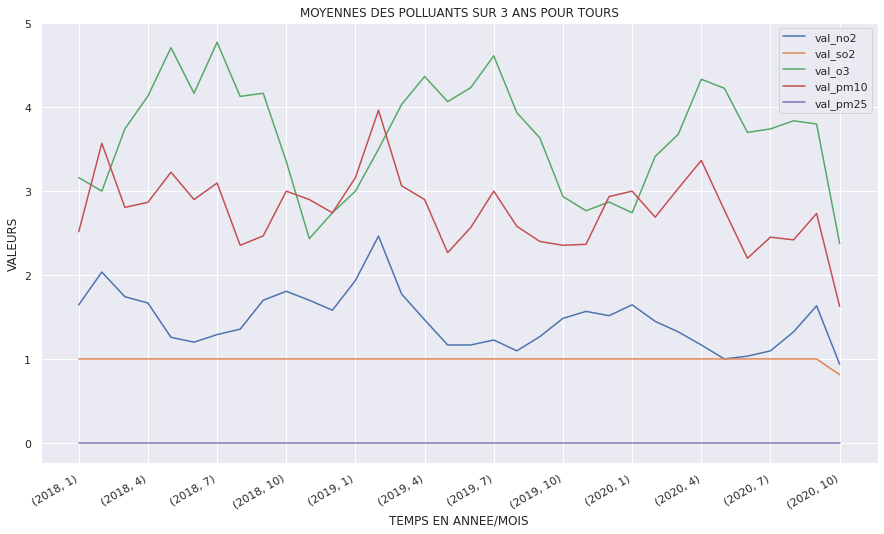

In [9]:
graphT= moyenneT.plot(figsize=(15,9), title="MOYENNES DES POLLUANTS SUR 3 ANS POUR TOURS", xticks=np.arange(0, 34, 3))
fig = graphT.get_figure()
axes = plt.gca()
axes.set_xlabel("TEMPS EN ANNEE/MOIS")
fig.autofmt_xdate()
axes.set_ylabel("VALEURS")

Text(0, 0.5, 'Fréquence')

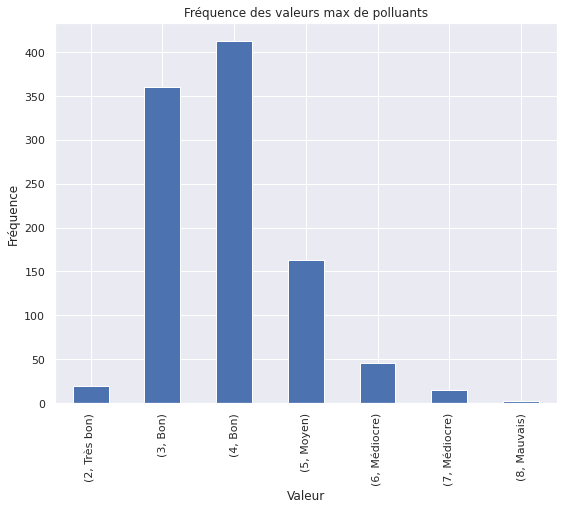

In [8]:
comTOU = compte("TOURS")
comTOU.plot(kind='bar', figsize= (9,7), title = "Fréquence des valeurs max de polluants") #, legend='Reverse'
plt.xlabel("Valeur")
plt.ylabel('Fréquence')

Text(0, 0.5, 'VALEURS')

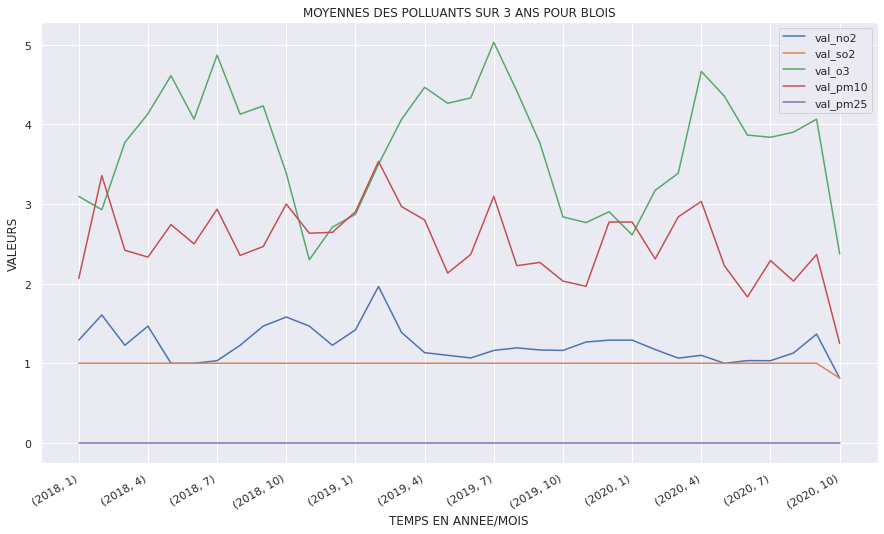

In [10]:
graphT= moyenneBL.plot(figsize=(15,9), title="MOYENNES DES POLLUANTS SUR 3 ANS POUR BLOIS", xticks=np.arange(0, 34, 3))
fig = graphT.get_figure()
axes = plt.gca()
axes.set_xlabel("TEMPS EN ANNEE/MOIS")
fig.autofmt_xdate()
axes.set_ylabel("VALEURS")

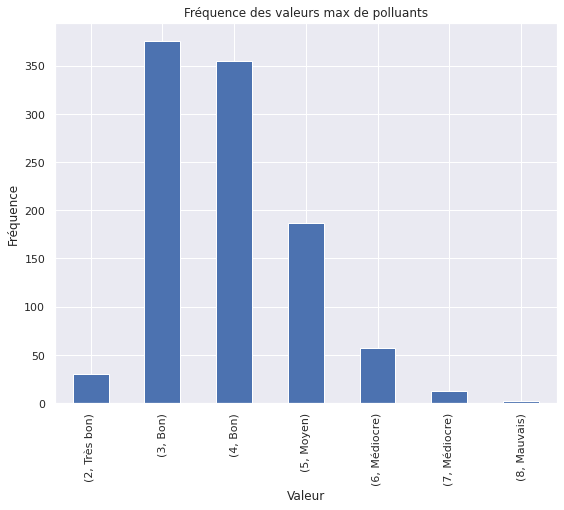

In [11]:
comBLO = compte("BLOIS")
comBLO.plot(kind='bar', figsize= (9,7), title = "Fréquence des valeurs max de polluants") #, legend='Reverse'
plt.xlabel("Valeur")
plt.ylabel('Fréquence')
plt.savefig("Fréquences_BLOIS.png")

Text(0, 0.5, 'VALEURS')

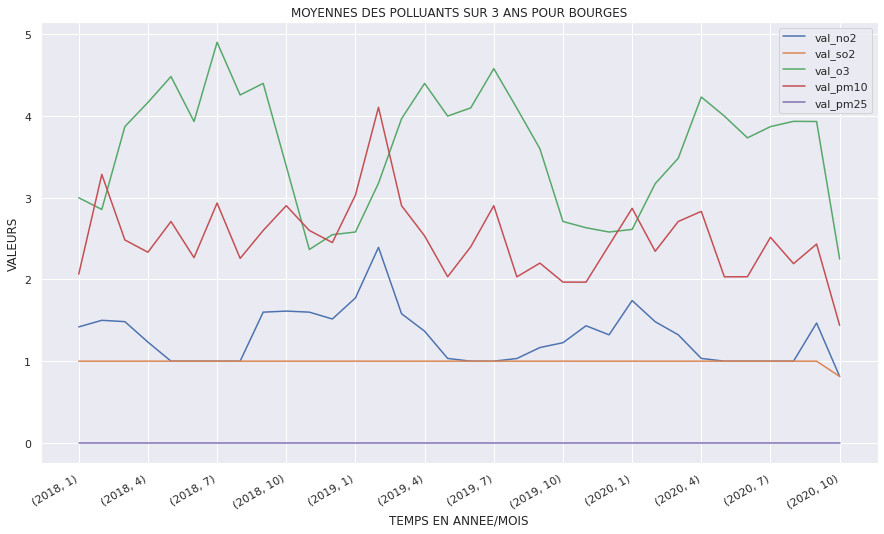

In [12]:
graphT= moyenneB.plot(figsize=(15,9), title="MOYENNES DES POLLUANTS SUR 3 ANS POUR BOURGES", xticks=np.arange(0, 34, 3))
fig = graphT.get_figure()
axes = plt.gca()
axes.set_xlabel("TEMPS EN ANNEE/MOIS")
fig.autofmt_xdate()
axes.set_ylabel("VALEURS")

Text(0, 0.5, 'Fréquence')

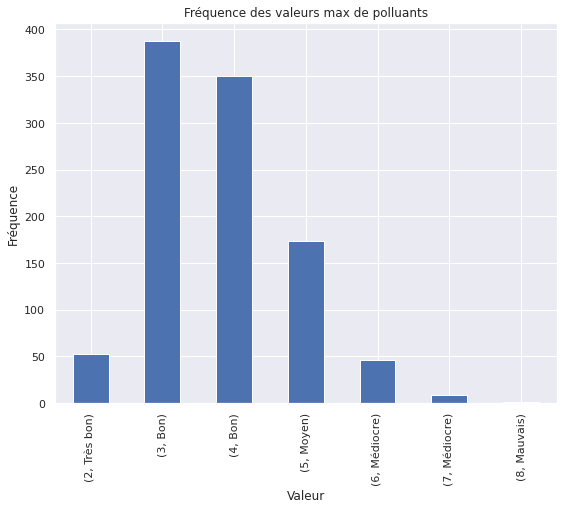

In [13]:
comBOU = compte("BOURGES")
comBOU.plot(kind='bar', figsize= (9,7), title = "Fréquence des valeurs max de polluants") #, legend='Reverse'
plt.xlabel("Valeur")
plt.ylabel('Fréquence')

Text(0, 0.5, 'VALEURS')

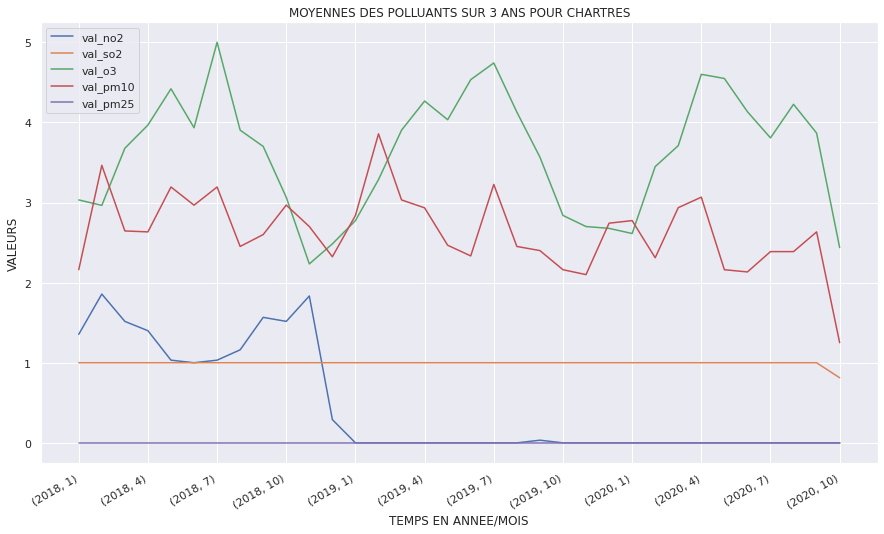

In [14]:
graphT= moyenneC.plot(figsize=(15,9), title="MOYENNES DES POLLUANTS SUR 3 ANS POUR CHARTRES", xticks=np.arange(0, 34, 3))
fig = graphT.get_figure()
axes = plt.gca()
axes.set_xlabel("TEMPS EN ANNEE/MOIS")
fig.autofmt_xdate()
axes.set_ylabel("VALEURS")

Text(0, 0.5, 'Fréquence')

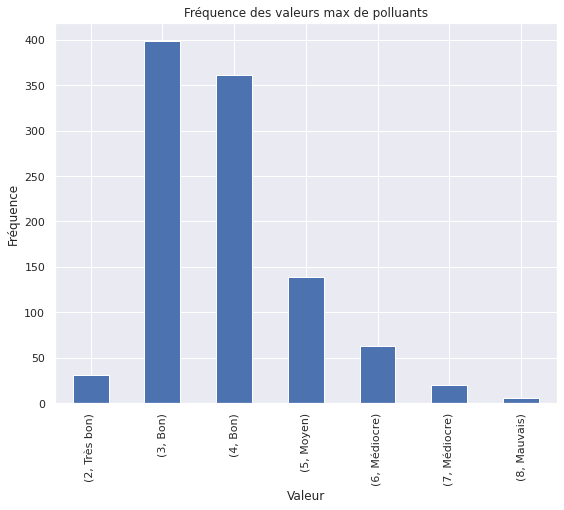

In [15]:
comCHAR = compte("CHARTRES")
comCHAR.plot(kind='bar', figsize= (9,7), title = "Fréquence des valeurs max de polluants") #, legend='Reverse'
plt.xlabel("Valeur")
plt.ylabel('Fréquence')

Text(0, 0.5, 'VALEURS')

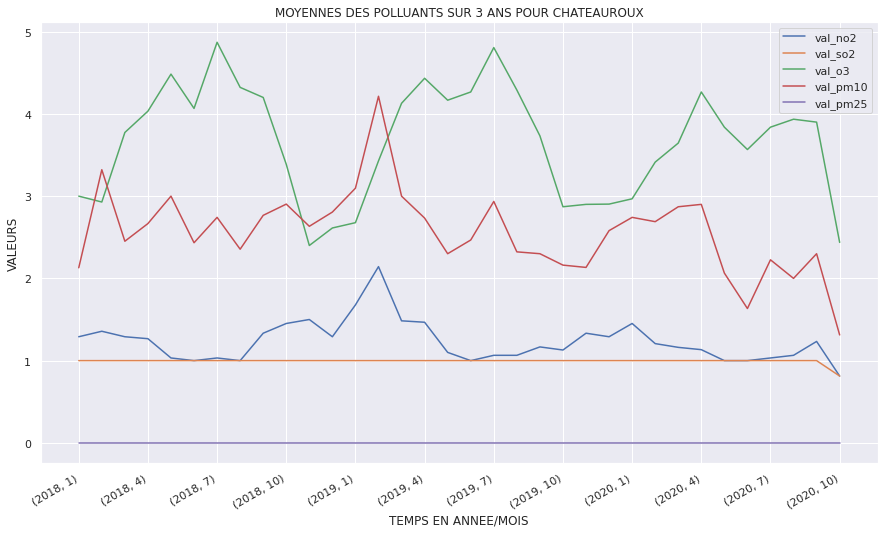

In [16]:
graphT= moyenneCH.plot(figsize=(15,9), title="MOYENNES DES POLLUANTS SUR 3 ANS POUR CHATEAUROUX", xticks=np.arange(0, 34, 3))
fig = graphT.get_figure()
axes = plt.gca()
axes.set_xlabel("TEMPS EN ANNEE/MOIS")
fig.autofmt_xdate()
axes.set_ylabel("VALEURS")

Text(0, 0.5, 'Fréquence')

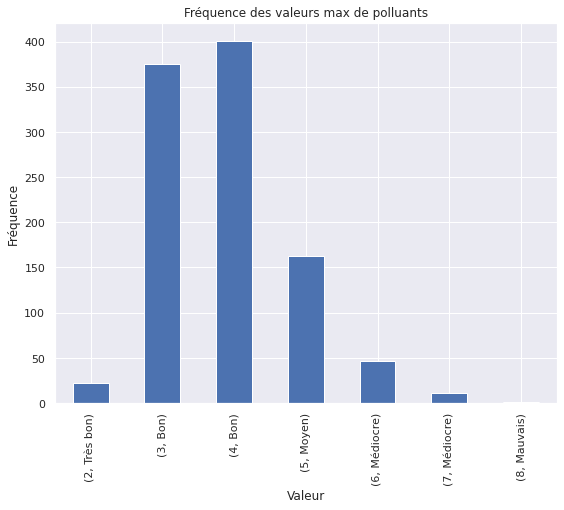

In [17]:
comCHAT = compte("CHATEAUROUX")
comCHAT.plot(kind='bar', figsize= (9,7), title = "Fréquence des valeurs max de polluants") #, legend='Reverse'
plt.xlabel("Valeur")
plt.ylabel('Fréquence')

Text(0, 0.5, 'VALEURS')

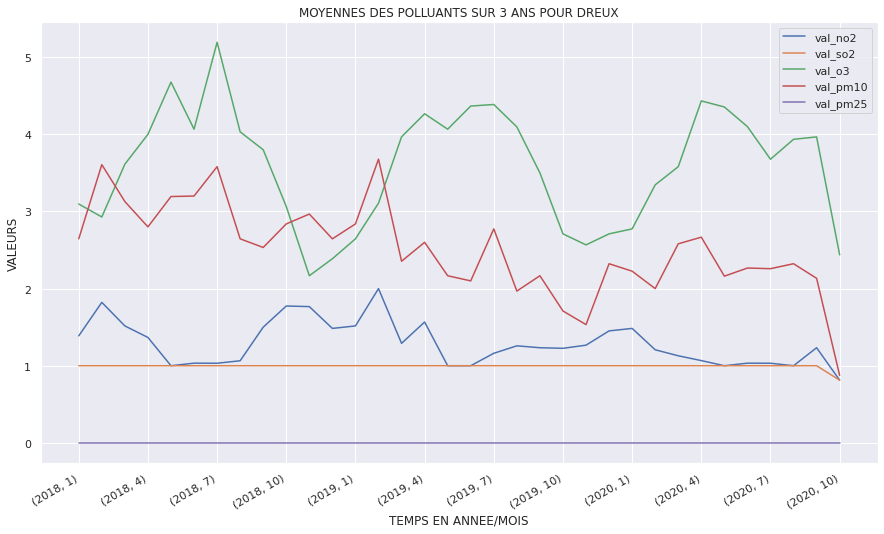

In [18]:
graphT= moyenneD.plot(figsize=(15,9), title="MOYENNES DES POLLUANTS SUR 3 ANS POUR DREUX", xticks=np.arange(0, 34, 3))
fig = graphT.get_figure()
axes = plt.gca()
axes.set_xlabel("TEMPS EN ANNEE/MOIS")
fig.autofmt_xdate()
axes.set_ylabel("VALEURS")

Text(0, 0.5, 'Fréquence')

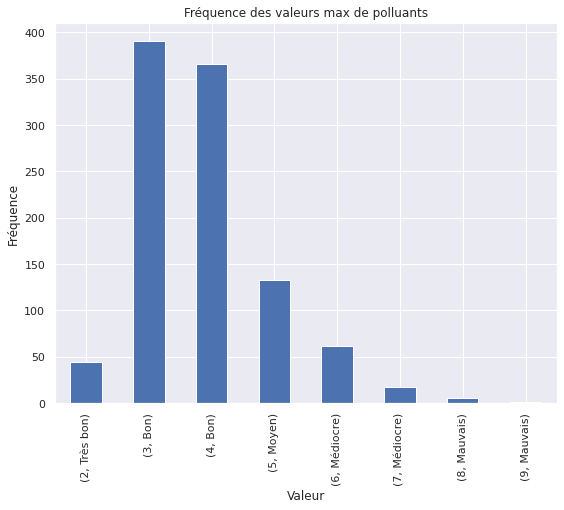

In [19]:
comDRE = compte("DREUX")
comDRE.plot(kind='bar', figsize= (9,7), title = "Fréquence des valeurs max de polluants") #, legend='Reverse'
plt.xlabel("Valeur")
plt.ylabel('Fréquence')

Text(0, 0.5, 'VALEURS')

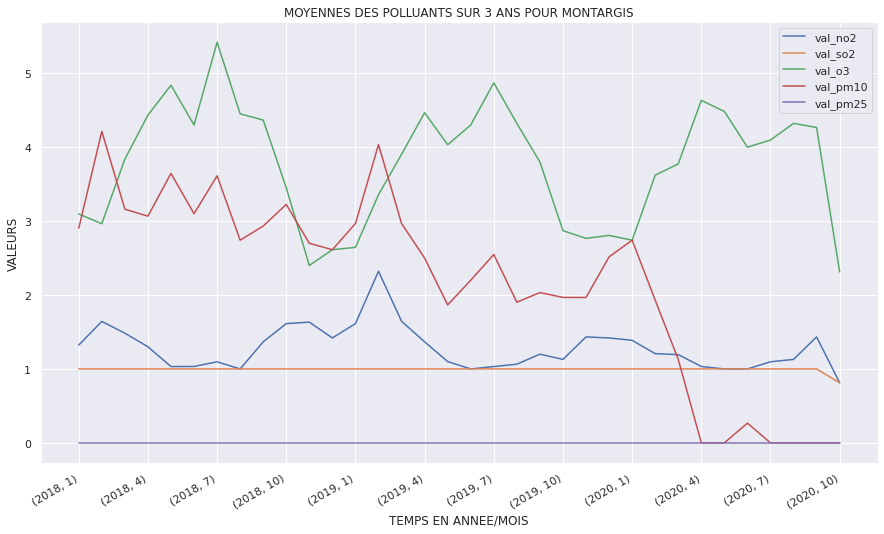

In [20]:
graphT= moyenneM.plot(figsize=(15,9), title="MOYENNES DES POLLUANTS SUR 3 ANS POUR MONTARGIS", xticks=np.arange(0, 34, 3))
fig = graphT.get_figure()
axes = plt.gca()
axes.set_xlabel("TEMPS EN ANNEE/MOIS")
fig.autofmt_xdate()
axes.set_ylabel("VALEURS")

Text(0, 0.5, 'Fréquence')

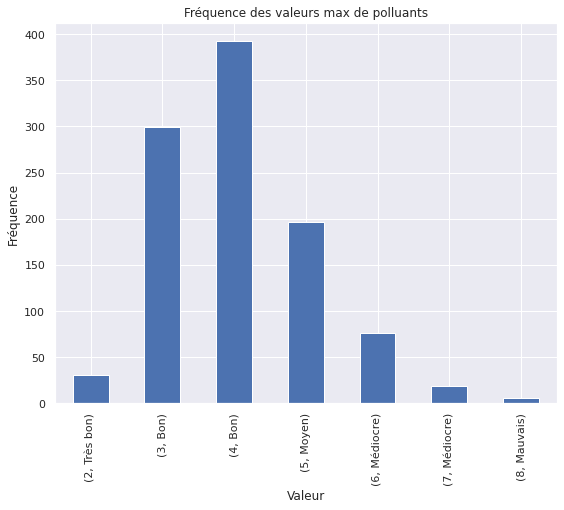

In [21]:
comMON = compte("MONTARGIS")
comMON.plot(kind='bar', figsize= (9,7), title = "Fréquence des valeurs max de polluants") #, legend='Reverse'
plt.xlabel("Valeur")
plt.ylabel('Fréquence')

Text(0, 0.5, 'VALEURS')

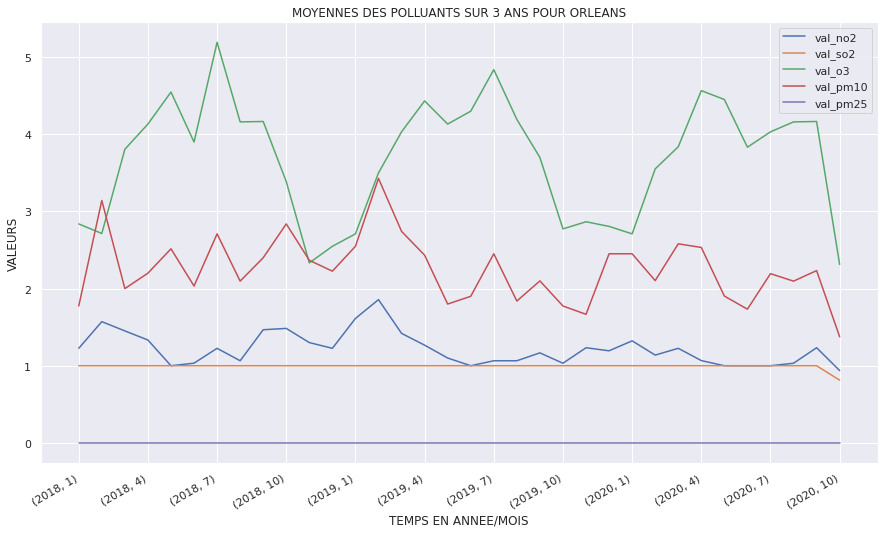

In [22]:
graphT= moyenneO.plot(figsize=(15,9), title="MOYENNES DES POLLUANTS SUR 3 ANS POUR ORLEANS", xticks=np.arange(0, 34, 3))
fig = graphT.get_figure()
axes = plt.gca()
axes.set_xlabel("TEMPS EN ANNEE/MOIS")
fig.autofmt_xdate()
axes.set_ylabel("VALEURS")

Text(0, 0.5, 'Fréquence')

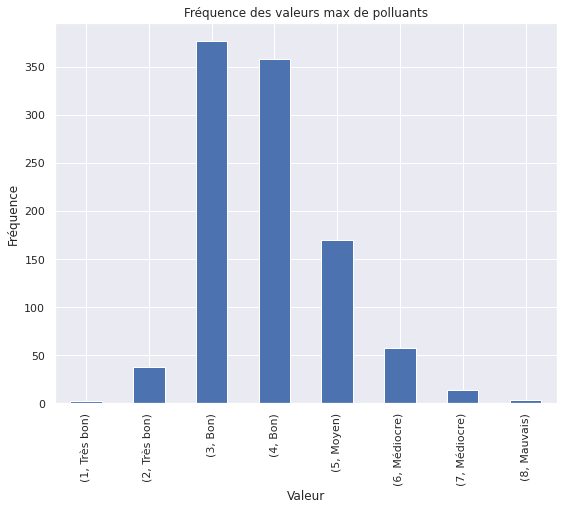

In [23]:
comORL = compte("ORLEANS")
comORL.plot(kind='bar', figsize= (9,7), title = "Fréquence des valeurs max de polluants") #, legend='Reverse'
plt.xlabel("Valeur")
plt.ylabel('Fréquence')

## Cartographie de la région Centre

Text(0.5, 0, 'Valeurs')

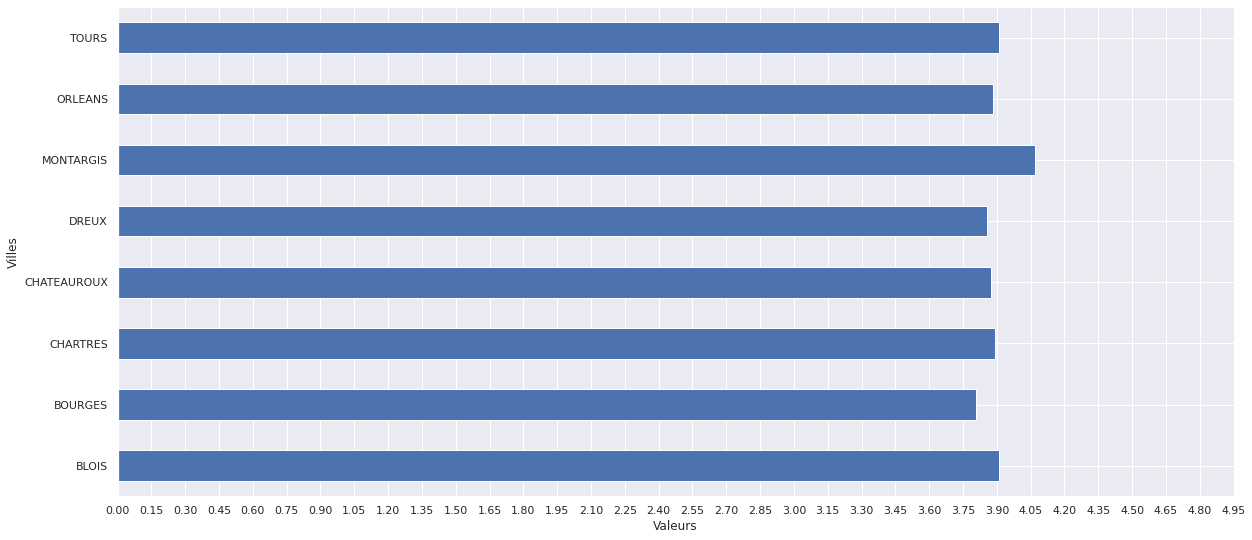

In [43]:
group_valeur = df.groupby('lib_zone')['valeur'].mean()
group_valeur.plot(figsize=(20,9), kind='barh', xticks=np.arange(0, 5, 0.15))
plt.ylabel('Villes')
plt.xlabel('Valeurs')

In [5]:
url = "https://opendata.arcgis.com/datasets/6f64bbd4f94c425791c2ec7eee33bb71_0.csv"
df = pd.read_csv(url)

df["jour"] = pd.DatetimeIndex(df["date_ech"]).day
df["mois"] = pd.DatetimeIndex(df["date_ech"]).month
df["an"] = pd.DatetimeIndex(df["date_ech"]).year

group_valeur = df.groupby('lib_zone')['X','Y','valeur'].mean().reset_index()
#group_valeur.plot(figsize=(20,9), kind='barh', xticks=np.arange(0, 5, 0.15))
#plt.ylabel('Villes')
#plt.xlabel('Valeurs')

group_valeur['color'] = pd.cut(group_valeur['valeur'], bins=[0, 3.81, 3.90, 4, 5], labels=["lightgreen", "green", "orange", "red"])

fig = folium.Figure(width=800, height=700)

map = folium.Map(location = [47.867990, 1.974466], zoom_start = 8.495).add_to(fig)

# Fill the map with your own dataframe
for X, Y, lib_zone, valeur, color in zip(group_valeur['X'], group_valeur['Y'],  group_valeur['lib_zone'], group_valeur['valeur'], group_valeur['color']):
  folium.Marker(location=[Y, X],
                popup=lib_zone,
                tooltip=str("Name : " + str(lib_zone)+ "<br>Valeur : "+ str(valeur)),
                icon=folium.Icon(color=color)
                ).add_to(map)
                
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Qualite de l'air</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Mauvais</li>
    <li><span style='background:orange;opacity:0.7;'></span>Moyenne</li>
    <li><span style='background:green;opacity:0.7;'></span>Acceptable</li>
    <li><span style='background:lightgreen;opacity:0.7;'></span>Mieux</li>
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map.get_root().add_child(macro)

map


<ipython-input-5-ee701cc9d09f>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_valeur = df.groupby('lib_zone')['X','Y','valeur'].mean().reset_index()


## Conclusion

Après avoir étudié le comportement de chaque polluant sur chacune des villes, nous avons constaté que notre analyse coïncide presque totalement avec la moyenne de la colonne valeur de Lig'Air pour chacune des villes. D'ici on peut déduire que la ville qui a le moins de polluants et donc la meilleure qualité de l'air, selon la moyenne des mesures de 2018 à aujourd'hui ( 18/10/2020 ) est Bourges